In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('/content/beer-servings.csv')

In [3]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [5]:
data.isnull().sum()

Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [7]:
data.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [8]:
data.describe()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,185.000000,185.000000,187.000000,192.000000
mean,96.000000,105.124324,83.221622,50.165775,4.741667
std,55.858452,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,20.000000,4.000000,1.000000,1.300000
50%,96.000000,76.000000,60.000000,9.000000,4.250000
75%,144.000000,185.000000,132.000000,60.500000,7.200000
max,192.000000,376.000000,438.000000,370.000000,14.400000


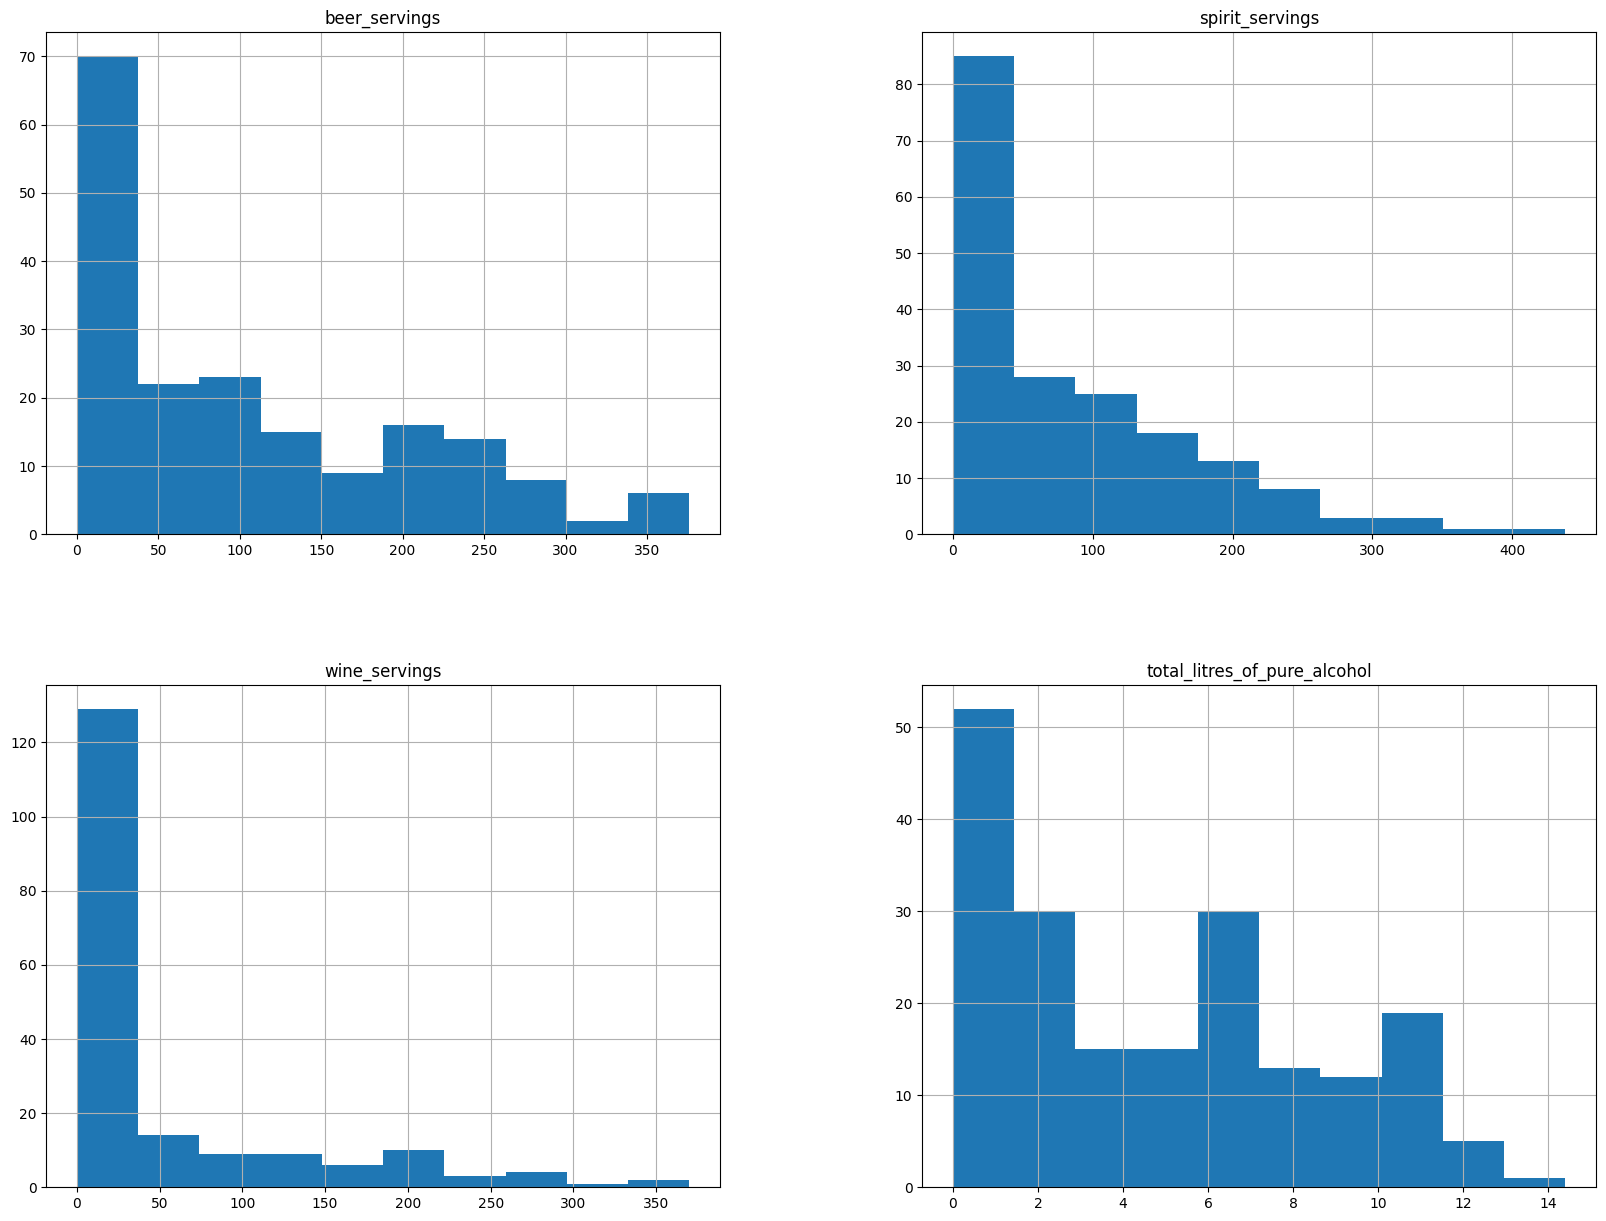

In [12]:
freqdata = data.select_dtypes(include='float64')
freqdata.hist(figsize = (20,15))
plt.show()

In [13]:
data.fillna(10)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,10.0,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [36]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())

In [37]:
data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,76.0,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [38]:
for col in ['spirit_servings','wine_servings','total_litres_of_pure_alcohol']:
  data[col] = data[col].fillna(data[col].median())

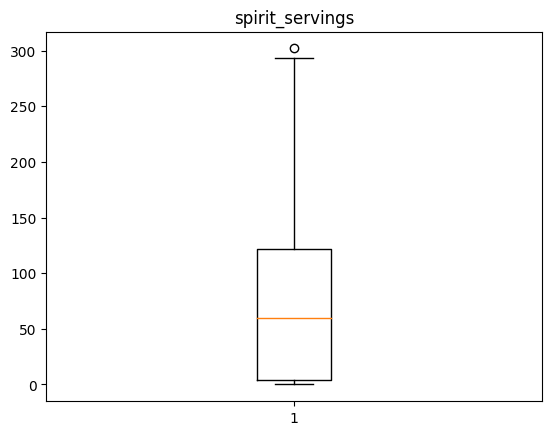

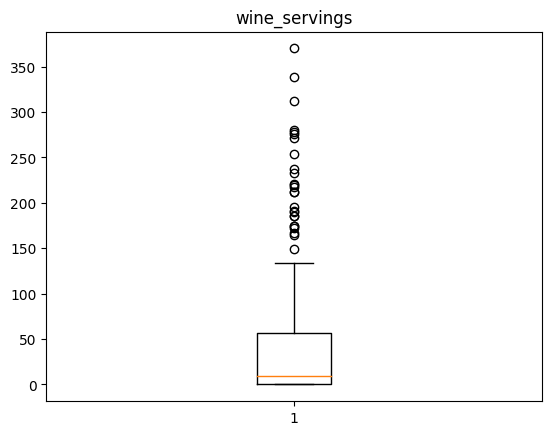

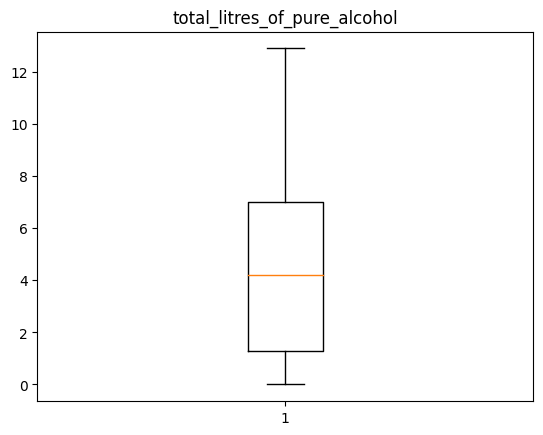

In [39]:
num_col = ['spirit_servings','wine_servings','total_litres_of_pure_alcohol']
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [25]:
q1 = np.percentile(data['spirit_servings'] , 25,method="midpoint")
q1

5.0

In [21]:
q2 = np.percentile(data['spirit_servings'] ,50,method="midpoint")

In [22]:
q3 = np.percentile(data['spirit_servings'], 75,method="midpoint")

In [23]:

print(q2)
print(q3)

5.0
60.0
128.0


In [24]:
iqr = q3 - q1

In [26]:
low_limit = q1 - 1.5*iqr
up_limit = q3 + 1.5*iqr

In [27]:
print(low_limit)
print(up_limit)

-179.5
312.5


In [28]:
outlier =[]
for x in data['spirit_servings']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

In [29]:
print(outlier)

[373.0, 438.0, 326.0, 326.0, 315.0]


In [34]:
ind1 = data['spirit_servings'] < low_limit
data.loc[ind1].index

Int64Index([], dtype='int64')

In [32]:
ind1 = data['spirit_servings'] > up_limit
data.loc[ind1].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [35]:
data.drop([15, 68, 73, 141, 144],inplace=True)